In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
config = pd.read_csv("./config.csv")

In [3]:
twitterApiKey= config['twitterApiKey'][0]
twitterApiSecret= config['twitterApiSecret'][0]
twitterApiAccessToken=config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret=config['twitterApiAccessTokenSecret'][0]

In [4]:
auth=tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)
auth.set_access_token(twitterApiAccessToken,twitterApiAccessTokenSecret)
twitterApi = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
twitterAccount = "KamalaHarris"

In [6]:
tweets = tweepy.Cursor(twitterApi.user_timeline,
                       screen_name=twitterAccount,
                       count=None,
                       since_id=None,
                       max_id=None,trim_user=True,exclude_replies=True,contributor_details=False,
                       include_entities=False).items(100);

In [7]:
#Creating a Datframe using the Tweets 
df = pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['Tweet'])

In [8]:
df.head()

,Tweet
0,RT @WhiteHouse: COVID-19 hit millions of small...
1,RT @VP: An investment in education is an inves...
2,The American Jobs Plan will put Americans to w...
3,"Tell your friends, your aunties and uncles, yo..."
4,RT @VP: Congratulations to our daughter Ella o...


In [9]:
#Function to Remove Mentions, Retweets , Urls and Hastags 
def Clean(text):    
        text = re.compile('\#').sub('', re.compile('RT @').sub('@', str(text), count=1).strip())
        text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",str(text)).split())
        return text

In [10]:
df['Tweet']=df['Tweet'].apply(Clean)

In [11]:
df.head(10)

,Tweet
0,COVID 19 hit millions of small businesses hard...
1,An investment in education is an investment in...
2,The American Jobs Plan will put Americans to w...
3,Tell your friends your aunties and uncles your...
4,Congratulations to our daughter Ella on her gr...
5,More than one third of people who live in rura...
6,This was made possible by the extraordinary su...
7,Big news from the CDC If you re fully vaccinat...
8,Get vaccinated not just for yourself but for y...
9,Women particularly women of color and trans wo...


In [12]:
#Function to get Ploarity of Tweets
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [13]:
#Fuction to get the Subjectivity of Tweets
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [14]:
#Applying the above functions to my Data Frame
df['Subjectivity']=df['Tweet'].apply(getTextSubjectivity)
df['Polarity']=df['Tweet'].apply(getTextPolarity)

In [15]:
df.head(10)

,Tweet,Subjectivity,Polarity
0,COVID 19 hit millions of small businesses hard...,0.480556,-0.013889
1,An investment in education is an investment in...,0.041667,0.000000
2,The American Jobs Plan will put Americans to w...,0.000000,0.000000
3,Tell your friends your aunties and uncles your...,0.000000,0.000000
4,Congratulations to our daughter Ella on her gr...,1.000000,0.800000
5,More than one third of people who live in rura...,0.256667,0.132727
6,This was made possible by the extraordinary su...,0.600000,0.293333
7,Big news from the CDC If you re fully vaccinat...,0.300000,0.250000
8,Get vaccinated not just for yourself but for y...,0.000000,0.000000
9,Women particularly women of color and trans wo...,0.366667,0.058333


In [16]:
df = df.drop(df[df['Tweet']==''].index)

In [17]:
df.head(10)

,Tweet,Subjectivity,Polarity
0,COVID 19 hit millions of small businesses hard...,0.480556,-0.013889
1,An investment in education is an investment in...,0.041667,0.000000
2,The American Jobs Plan will put Americans to w...,0.000000,0.000000
3,Tell your friends your aunties and uncles your...,0.000000,0.000000
4,Congratulations to our daughter Ella on her gr...,1.000000,0.800000
5,More than one third of people who live in rura...,0.256667,0.132727
6,This was made possible by the extraordinary su...,0.600000,0.293333
7,Big news from the CDC If you re fully vaccinat...,0.300000,0.250000
8,Get vaccinated not just for yourself but for y...,0.000000,0.000000
9,Women particularly women of color and trans wo...,0.366667,0.058333


In [18]:
#Function to return the strings for Score
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"

In [19]:
df["Score"]=df['Polarity'].apply(getTextAnalysis)

In [20]:
df.head(10)

,Tweet,Subjectivity,Polarity,Score
0,COVID 19 hit millions of small businesses hard...,0.480556,-0.013889,Negative
1,An investment in education is an investment in...,0.041667,0.000000,Neutral
2,The American Jobs Plan will put Americans to w...,0.000000,0.000000,Neutral
3,Tell your friends your aunties and uncles your...,0.000000,0.000000,Neutral
4,Congratulations to our daughter Ella on her gr...,1.000000,0.800000,Positive
5,More than one third of people who live in rura...,0.256667,0.132727,Positive
6,This was made possible by the extraordinary su...,0.600000,0.293333,Positive
7,Big news from the CDC If you re fully vaccinat...,0.300000,0.250000,Positive
8,Get vaccinated not just for yourself but for y...,0.000000,0.000000,Neutral
9,Women particularly women of color and trans wo...,0.366667,0.058333,Positive


In [21]:
#Calculating Percentage of Positive Tweets
positive= df[df['Score']=="Positive"]
print(str(positive.shape[0]/(df.shape[0])*100)+"% of tweets are Positive.")
pos=positive.shape[0]/df.shape[0]*100

50.0% of tweets are Positive.


In [22]:
#Calculating Percentage of Neagtive Tweets
negative= df[df['Score']=="Negative"]
print(str(negative.shape[0]/(df.shape[0])*100)+"% of tweets are Negative.")
neg=negative.shape[0]/df.shape[0]*100

12.0% of tweets are Negative.


In [23]:
#Calculating Percentage of Neutral Tweets
neutral= df[df['Score']=="Neutral"]
print(str(neutral.shape[0]/(df.shape[0])*100)+"% of tweets are Neutral.")
neutrall=neutral.shape[0]/df.shape[0]*100

38.0% of tweets are Neutral.


In [24]:
#Plotting a Pie Chart to show Positive, Negative and Neutral Tweet Percentage
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neutrall]
colors=['yellowgreen','lightcoral','gold']

Text(0.5, 1.0, 'Pie Chart For Tweet Percentages')

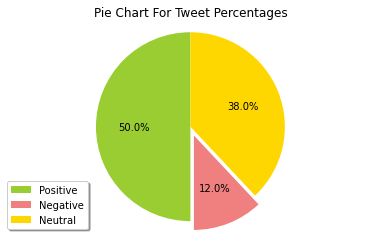

In [25]:
plt.pie(sizes,explode,colors=colors,autopct='%1.1f%%',startangle=90)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.title("Pie Chart For Tweet Percentages")

<BarContainer object of 3 artists>

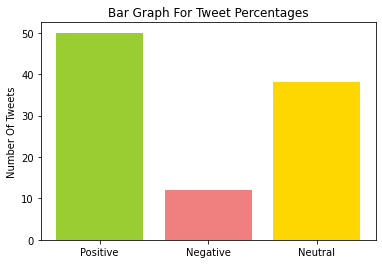

In [26]:
#bar graph
labels = 'Positive','Negative','Neutral'
plt.title("Bar Graph For Tweet Percentages")
plt.ylabel("Number Of Tweets")
plt.bar(labels, sizes, color=colors)

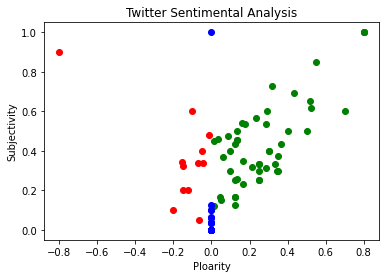

In [27]:
#Plotting a Scatter graph between Subjectivity and Polarity
for index, row in df.iterrows():
    if row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    elif row['Score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')  

plt.title('Twitter Sentimental Analysis')
plt.xlabel('Ploarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#Thank You